# Estudio de tendencia y estacionalidad con la tasa de positivos

Primero importamos los datos

In [26]:

import pandas as pd
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt

## Carga y exploración inicial de los datos

In [27]:
data_5 = pd.read_csv('data5.csv', parse_dates = [0], index_col = [0], usecols = ['Date', 'Name test',       'Country', 'City', 'Postal code', 'longitud', 'latitud', 'Valor',       'Cod_prov'])
data_5.shape

(42814, 8)

In [28]:
data_5.head()

,Name test,Country,City,Postal code,longitud,latitud,Valor,Cod_prov
Date,,,,,,,,
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.294704,41.627626,Negativo,8.0
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.295000,41.627454,Negativo,8.0
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.294975,41.627452,Negativo,8.0
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.295089,41.627480,Negativo,8.0
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.295028,41.627465,Negativo,8.0


In [29]:
data_5['Valor'].value_counts()

Valor
Negativo    36484
Positivo     4867
Resto        1463
Name: count, dtype: int64

In [30]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42814 entries, 2020-07-20 to 2024-10-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name test    42814 non-null  object 
 1   Country      42814 non-null  object 
 2   City         42814 non-null  object 
 3   Postal code  42811 non-null  float64
 4   longitud     42728 non-null  float64
 5   latitud      42728 non-null  float64
 6   Valor        42814 non-null  object 
 7   Cod_prov     42811 non-null  float64
dtypes: float64(4), object(4)
memory usage: 2.9+ MB


## Preprocesamiento de datos borrando las filas sin codigo postal

In [31]:
# Borramos las filas que no tienen CP
data_5.dropna(subset = ['Postal code'], inplace = True)
data_5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42811 entries, 2020-07-20 to 2024-10-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name test    42811 non-null  object 
 1   Country      42811 non-null  object 
 2   City         42811 non-null  object 
 3   Postal code  42811 non-null  float64
 4   longitud     42725 non-null  float64
 5   latitud      42725 non-null  float64
 6   Valor        42811 non-null  object 
 7   Cod_prov     42811 non-null  float64
dtypes: float64(4), object(4)
memory usage: 2.9+ MB


### Calculamos tasa de positivos de leishmania

In [32]:
# Solo Leishmania
df = data_5[(data_5['Name test'] == 'Leishmania')].sort_index()
df

,Name test,Country,City,Postal code,longitud,latitud,Valor,Cod_prov
Date,,,,,,,,
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.294704,41.627626,Negativo,8.0
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.295000,41.627454,Negativo,8.0
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.294975,41.627452,Negativo,8.0
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.295089,41.627480,Negativo,8.0
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.295028,41.627465,Negativo,8.0
...,...,...,...,...,...,...,...,...
2024-10-31,Leishmania,Spain,Las Palmas,35018.0,-15.475251,28.075976,Resto,35.0
2024-10-31,Leishmania,Spain,Cádiz,11500.0,-6.241169,36.595153,Negativo,11.0
2024-10-31,Leishmania,Spain,Córdoba,14004.0,-4.793745,37.872509,Negativo,14.0


Tasa diaria:

In [33]:
df_pivot = df.pivot_table(index= df.index, columns= 'Valor', values= 'Country', aggfunc=  'count').fillna(0)
df_pivot['total_controles'] = df_pivot.sum(axis= 1)
df_pivot

Valor,Negativo,Positivo,Resto,total_controles
Date,,,,
2020-07-20,8.0,0.0,0.0,8.0
2020-07-21,8.0,4.0,1.0,13.0
2020-07-22,0.0,2.0,1.0,3.0
2020-07-23,4.0,2.0,1.0,7.0
2020-07-29,2.0,0.0,0.0,2.0
...,...,...,...,...
2024-10-27,2.0,0.0,0.0,2.0
2024-10-28,66.0,4.0,1.0,71.0
2024-10-29,40.0,6.0,0.0,46.0


In [34]:
# Tasa positivos diario
df_pivot['tasa_pos'] = df_pivot['Positivo'] / df_pivot['total_controles']
df_day = df_pivot.copy()
df_day

Valor,Negativo,Positivo,Resto,total_controles,tasa_pos
Date,,,,,
2020-07-20,8.0,0.0,0.0,8.0,0.000000
2020-07-21,8.0,4.0,1.0,13.0,0.307692
2020-07-22,0.0,2.0,1.0,3.0,0.666667
2020-07-23,4.0,2.0,1.0,7.0,0.285714
2020-07-29,2.0,0.0,0.0,2.0,0.000000
...,...,...,...,...,...
2024-10-27,2.0,0.0,0.0,2.0,0.000000
2024-10-28,66.0,4.0,1.0,71.0,0.056338
2024-10-29,40.0,6.0,0.0,46.0,0.130435


Tasa semanal:

In [35]:
df['year'] = df.index.year
week = df.groupby([ pd.Grouper(freq = 'W'), 'Valor']).Country.count().unstack().fillna(0)
week['total_controles'] = week.sum(axis= 1)
week['tasa_pos'] = week['Positivo'] / week['total_controles']
df_week = week.copy()
df_week

Valor,Negativo,Positivo,Resto,total_controles,tasa_pos
Date,,,,,
2020-07-26,20.0,8.0,3.0,31.0,0.258065
2020-08-02,2.0,0.0,2.0,4.0,0.000000
2020-08-09,3.0,1.0,8.0,12.0,0.083333
2020-08-30,0.0,0.0,4.0,4.0,0.000000
2020-09-06,1.0,3.0,0.0,4.0,0.750000
...,...,...,...,...,...
2024-10-06,309.0,28.0,8.0,345.0,0.081159
2024-10-13,260.0,25.0,4.0,289.0,0.086505
2024-10-20,275.0,26.0,7.0,308.0,0.084416


Tasa mensual:

In [36]:
df['year'] = df.index.year
month = df.groupby([ pd.Grouper(freq = 'MS'), 'Valor']).Country.count().unstack().fillna(0)
month['total_controles'] = month.sum(axis= 1)
month['tasa_pos'] = month['Positivo'] / month['total_controles']
df_month = month.copy()
df_month

Valor,Negativo,Positivo,Resto,total_controles,tasa_pos
Date,,,,,
2020-07-01,22.0,8.0,5.0,35.0,0.228571
2020-08-01,3.0,1.0,12.0,16.0,0.062500
2020-09-01,46.0,3.0,1.0,50.0,0.060000
2020-10-01,9.0,0.0,0.0,9.0,0.000000
2020-11-01,12.0,0.0,0.0,12.0,0.000000
2020-12-01,10.0,0.0,0.0,10.0,0.000000
2021-01-01,0.0,1.0,0.0,1.0,1.000000
2021-02-01,3.0,1.0,0.0,4.0,0.250000
2021-04-01,0.0,3.0,0.0,3.0,1.000000


## Análisis de la tasa semanal
Igual que en el estudio de numero de casos totales, se analiza la tasa semanal de positivos agrupando los datos por semana para identificar patrones de tendencia y estacionalidad.

In [37]:
df_week['year'] = df_week.index.year
df_week['week'] = df_week.index.isocalendar().week
df_week[df_week.duplicated(subset= ['year', 'week'])]
df_week.loc['2023-12']

Valor,Negativo,Positivo,Resto,total_controles,tasa_pos,year,week
Date,,,,,,,
2023-12-03,166.0,23.0,2.0,191.0,0.120419,2023,48
2023-12-10,89.0,22.0,4.0,115.0,0.191304,2023,49
2023-12-17,41.0,4.0,0.0,45.0,0.088889,2023,50
2023-12-24,26.0,2.0,1.0,29.0,0.068966,2023,51
2023-12-31,19.0,2.0,0.0,21.0,0.095238,2023,52


In [38]:
df_week_p = df_week.pivot_table(index = 'week', columns = 'year', values= 'tasa_pos', aggfunc='max').fillna(0)
df_week_p

year,2020,2021,2022,2023,2024
week,,,,,
1,0.000000,0.000000,0.075758,0.109756,0.214286
2,0.000000,0.000000,0.170732,0.103586,0.058824
3,0.000000,1.000000,0.096491,0.101124,0.264151
4,0.000000,0.000000,0.101266,0.073359,0.142857
5,0.000000,0.000000,0.089474,0.091549,0.241379
6,0.000000,0.000000,0.119048,0.087912,0.214286
7,0.000000,0.000000,0.138211,0.107872,0.048780
8,0.000000,0.500000,0.115385,0.057637,0.177778
9,0.000000,0.000000,0.059701,0.092437,0.205128


### Visualizacion de la tasa

In [39]:
data= []
week = df_week_p.copy()
for col in week.columns:
    trace = go.Scatter(
        x = week.index,
        y = week[col],
        name = col,
    # IMPORTANTE: establecemos que es un gráfico de líneas
        mode = 'lines'
    )

    data.append(trace)

layout = dict(
            title = dict( text = "Tasa de positivos semanales por año" ),
            # Configuración del eje X
            xaxis = dict(

            ),
         )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Estudio de estacionalidad semanal usando la tasa

En esta sección se analizará la estacionalidad semanal de la tasa de positivos de Leishmania. Se utilizarán herramientas estadísticas, como la descomposición de la serie y el análisis de autocorrelación.

**Bibliografía:**

- https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf
- https://machinelearningmastery.com/time-series-data-stationary-python/
- https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/

In [40]:
week = df_week['tasa_pos']
# rellenamos las semanas para las que no tenemos datos con 0's
week = week.resample('W').min().fillna(0)
week

Date
2020-07-26    0.258065
2020-08-02    0.000000
2020-08-09    0.083333
2020-08-16    0.000000
2020-08-23    0.000000
                ...   
2024-10-06    0.081159
2024-10-13    0.086505
2024-10-20    0.084416
2024-10-27    0.095395
2024-11-03    0.078704
Freq: W-SUN, Name: tasa_pos, Length: 224, dtype: float64

In [41]:
# Aplicamos test de estacionalidad

from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("RESULTADO: Stationary")
    else:
        print("RESULTADO: Non-stationary")

check_stationarity(week)

ADF Statistic: -2.319796
p-value: 0.165663
Critical Values:
	1%: -3.462
	5%: -2.875
	10%: -2.574
RESULTADO: Non-stationary


El test de Dickey-Fuller Aumentado (ADF) aplicado a la serie semanal de la tasa de positivos de Leishmania arrojó un p-value mayor a 0.05, lo que indica que no se puede rechazar la hipótesis nula de no estacionariedad. Esto significa que la serie presenta tendencia o estacionalidad y no es estacionaria en su forma original. 

## Descomposición
En esta sección se analizará la serie temporal semanal de la tasa de positivos de Leishmania mediante técnicas de descomposición. El objetivo es separar la serie en sus componentes principales: tendencia, estacionalidad y residuo. Esto permite identificar patrones subyacentes y comprender mejor la estructura de la serie antes de aplicar modelos de predicción o realizar análisis adicionales.

In [42]:
week

Date
2020-07-26    0.258065
2020-08-02    0.000000
2020-08-09    0.083333
2020-08-16    0.000000
2020-08-23    0.000000
                ...   
2024-10-06    0.081159
2024-10-13    0.086505
2024-10-20    0.084416
2024-10-27    0.095395
2024-11-03    0.078704
Freq: W-SUN, Name: tasa_pos, Length: 224, dtype: float64

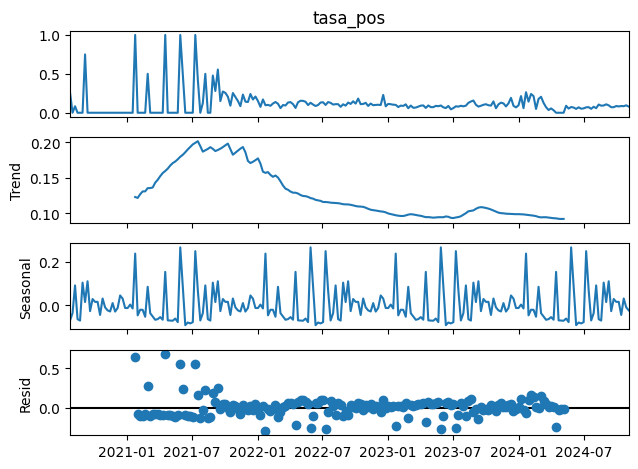

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(week, model='additive', period=52)
result.plot()
plt.show()

## Estudio de autocorrelación y autocorrelación parcial

La autocorrelación representa la correlación entre una secuencia y sí misma. Podemos hacer un análisis de autocorrelación para ver si los datos se correlacionan con la misma serie desplazada 1 semana, 2 semanas, 3 semanas, etc. A lo mejor podríamos ver que si en un año X el calor llega más tarde, los casos de Leishmania aparecen también más tarde en el año Y. Veríamos estacionalidad anual si en la semana 52 (más o menos) se ve un pico alto.

La secuencia de hace varios períodos atrás se llama “retraso” o “lag” en inglés, porque es una versión retrasada de la original.

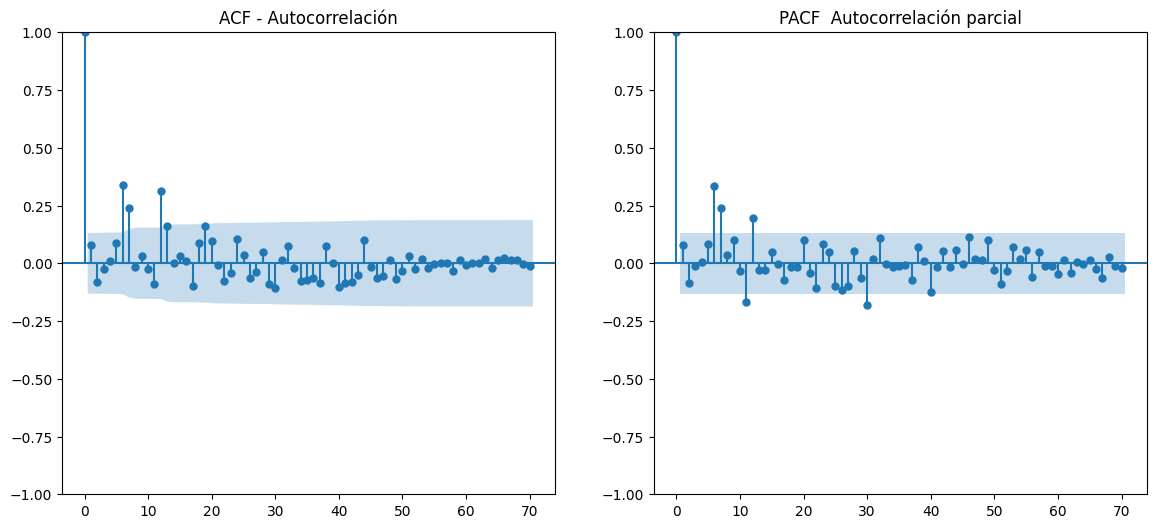

In [44]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  #

plot_acf(week, lags=70, ax = axes[0])  # mirar hasta 3 años
axes[0].set_title('ACF - Autocorrelación')


# Graficar PACF
plot_pacf(week, lags=70, ax = axes[1])  # lags es cuántos lags se muestran
axes[1].set_title('PACF  Autocorrelación parcial');

Este gráfico sugiere que nuestra serie temporal sigue un patrón de tipo "random walk", es decir, que los cambios en la serie temporal son aleatorios. Los random walks no son estacionarios, pero pueden volverse estacionarias al diferenciar.

En el gráfico izquierdo, los valores en el eje x representan los retrasos en semanas, que en este caso van hasta 70. En el eje Y tenemos los valores para el coeficiente de autocorrelación. La correlación solo puede tomar valores entre -1 y 1.
Las líneas en el gráfico representan la autocorrelación entre el número de casos y una versión retrasada de de la serie. La primera línea indica la autocorrelación de la semana con sigo misma, la segunda línea representa la autocorrelación de la serie, con la serie con una senmana de retraso, y así sucesivamente. La primera línea es uno porque la correlación entre un valor y sí mismo siempre será uno.

El área azul alrededor del eje X representa la significación de los valores de autocorrelación. Es decir, mide si son significativamente distintos de cero, lo que sugiere la existencia de autocorrelación para ese retraso específico.

Lo que podemos ver, es que solo hay una correlación muy débil (0.37 aprox) con las semanas 6 y 12 semanas anteriores, es decir, el valor actual depende del valor de la semana 6 anterior. Si vemos la autocorrelación parcial (derecha), vemos que  hay correlación con el dato de la semana 6  anterior.

## Estudio de las diferencias

Vamos a calcular la serie de la primera diferencia (diferencia con respecto al mes anterior):

In [54]:
# Como la serie no es estacionaria, podemos aplicar diferenciación
# Realizar una diferenciación simple
w_diff = week.diff().dropna()

# Comprobar si después de la diferenciación la serie es estacionaria
check_stationarity(w_diff)

ADF Statistic: -7.052612
p-value: 0.000000
Critical Values:
	1%: -3.462
	5%: -2.875
	10%: -2.574
RESULTADO: Stationary


Las diferencias son estacionales. Ahora vemos la autocorrelación:

Al aplicar la diferenciación estacional, eliminamos la tendencia y parte de la estacionalidad de la serie, permitiendo analizar mejor la estructura interna de los datos. La autocorrelación de la serie diferenciada nos ayuda a identificar si persisten patrones repetitivos o dependencias temporales tras este preprocesamiento. Si los valores de autocorrelación están dentro de los intervalos de confianza, indica que la serie diferenciada se comporta como ruido blanco y no presenta autocorrelación significativa, lo que es deseable para el modelado ARIMA.

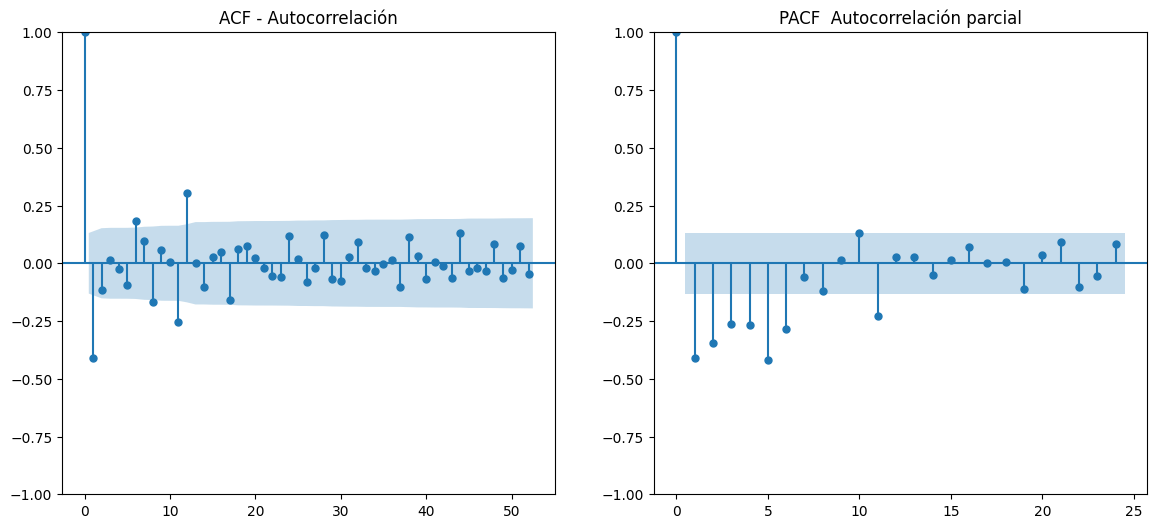

In [55]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  #

plot_acf(w_diff, lags=52, ax = axes[0])  # mirar hasta 3 años
axes[0].set_title('ACF - Autocorrelación')


# Graficar PACF
plot_pacf(w_diff, lags=24, ax = axes[1])  # lags es cuántos lags se muestran
axes[1].set_title('PACF  Autocorrelación parcial');

En este caso, los valores de la autocorrelación son pequeños, cercanas a cero y por debajo de los niveles de confianza del 95 %

## Selección de los mejores parámetros para el modelo ARIMA
En esta sección se realizará una búsqueda de los valores óptimos de los parámetros (p, d, q) para ajustar un modelo ARIMA a la serie temporal semanal de la tasa de positivos.

In [56]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Suponiendo que `data` es tu serie temporal
# data = pd.Series(...)

best_aic = np.inf
best_order = None
best_model = None

# Define rangos posibles para p, d, q
p_range = range(0, 4)
d_range = range(0,4)
q_range = range(0, 4)

# Grid search
for p in p_range:
    for d in d_range:
        for q in q_range:
            try:
                model = ARIMA(week, order=(p, d, q)).fit()
                if model.aic < best_aic:
                    best_aic = model.aic
                    best_order = (p, d, q)
                    best_model = model
            except:
                continue

print(f"Mejor modelo ARIMA: {best_order} con AIC = {best_aic:.2f}")


Mejor modelo ARIMA: (2, 0, 3) con AIC = -205.73


* p = 2: número de retardos autoregresivos (AR). El modelo se basa en las 2 observaciones anteriores para predecir la siguiente.
* d = 0: número de diferenciaciones necesarias para hacer la serie estacionaria (I, de "Integrated"). Esto es raro. Sale 0, como si la serie inicial fuera estacionaria, aunque no lo es. El caso es que al devolver 0, es como si no hiciéramos diferenciación.
* q = 3: número de términos del promedio móvil (MA). Usa los últimos 3 errores del modelo (residuos) para mejorar la predicción.

### Predicción

Vamos a ver qué dice ARIMA:

In [57]:
from statsmodels.tsa.arima.model import ARIMA

# Supón que 'y' es tu serie temporal
model = ARIMA(week, order=(2, 0, 3))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:               tasa_pos   No. Observations:                  224
Model:                 ARIMA(2, 0, 3)   Log Likelihood                 109.866
Date:                Sun, 24 Aug 2025   AIC                           -205.731
Time:                        11:49:32   BIC                           -181.850
Sample:                    07-26-2020   HQIC                          -196.092
                         - 11-03-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1160      0.026      4.458      0.000       0.065       0.167
ar.L1          1.3444      0.146      9.200      0.000       1.058       1.631
ar.L2         -0.5197      0.123     -4.227      0.0

* Log-Likelihood: cuanto más cercano a 0 mejor
* sigma2: valor bajo lo que nos dice que la varianza de los residuos es pequeña ( p-value = 0 <  0.001 ) significativo
* Residuos: Se producen 3 cosas no deseables:
    * Hay correlación entre los residuos, lo cual es malo . (Ljung-Box).
    * No hay normalidad de residuos (Jarque-Bera (esto es malo)).
    * Hay Heterocesasticiadad (varianza no es constante).

Luego este modelo no captura bien la estructura de los datos.

#### Analizamos los residuos para asegurarnos de que el modelo no es bueno.

In [58]:
# autocorrrelación de residuos
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box = acorr_ljungbox(results.resid, lags=[52], return_df=True)

print(ljung_box)

      lb_stat  lb_pvalue
52  78.255245   0.010742


p-valor < 0.05, autocorrelación  de residuos

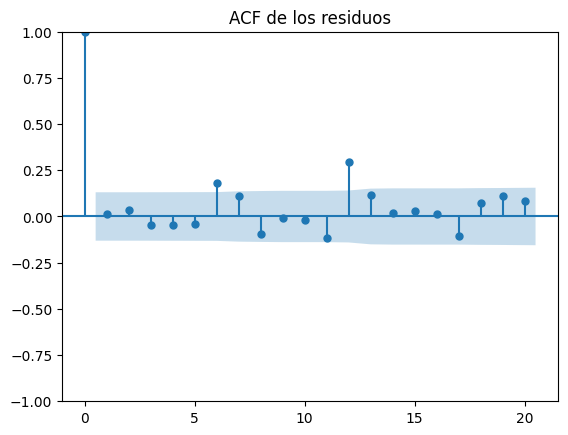

In [59]:
# Analizamos los residuos.
# Si todos los puntos están dentro del intervalo de confianza (líneas azules), los residuos no están autocorrelacionados, lo cual es bueno
plot_acf(results.resid, lags=20)
plt.title("ACF de los residuos")
plt.show()

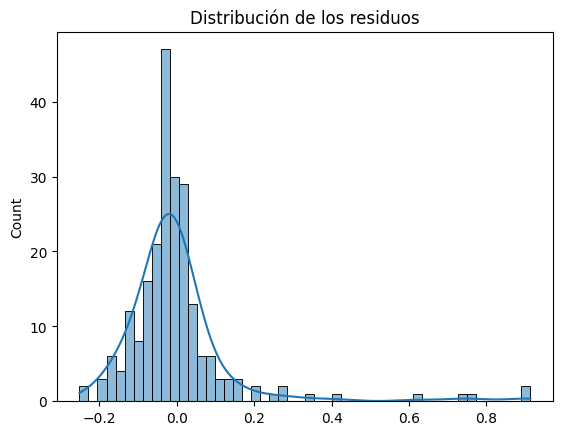

p-valor Shapiro-Wilk: 0.0000
residuos no normales


In [60]:
# analisis de residuos
import seaborn as sns
from scipy.stats import shapiro

# Histograma con curva KDE
sns.histplot(results.resid, kde=True)
plt.title("Distribución de los residuos")
plt.show()

# Prueba de Shapiro-Wilk
stat, p = shapiro(results.resid)
print(f"p-valor Shapiro-Wilk: {p:.4f}")

if p > 0.05:
    print("residuos aproximadamente normales")
else:
    print("residuos no normales")


In [61]:
from statsmodels.stats.diagnostic import het_arch

arch_test = het_arch(results.resid)
print(f"ARCH Test p-valor: {arch_test[1]:.4f}")

if arch_test[1] > 0.05:
    print("(varianza constante)")
else:
    print("heterocedasticidad (varianza no constante)")

ARCH Test p-valor: 0.0000
heterocedasticidad (varianza no constante)


Con el análisis de residuos, concluimos que Arima no es apropiado

# Predicciones

Cómo quedarían las predicciones (aunque ya hemos dicho que el modelo no va bien aquí)


Predicciones:
 2024-09-01    0.125931
2024-09-08    0.135457
2024-09-15    0.088675
2024-09-22    0.127061
2024-09-29    0.131258
2024-10-06    0.091869
2024-10-13    0.127692
2024-10-20    0.127697
2024-10-27    0.094877
2024-11-03    0.127924
Freq: W-SUN, Name: predicted_mean, dtype: float64

Intervalos de confianza:
             lower tasa_pos  upper tasa_pos
2024-09-01       -0.169043        0.420905
2024-09-08       -0.163290        0.434204
2024-09-15       -0.210946        0.388296
2024-09-22       -0.172945        0.427067
2024-09-29       -0.171586        0.434102
2024-10-06       -0.211820        0.395557
2024-10-13       -0.176161        0.431545
2024-10-20       -0.178267        0.433662
2024-10-27       -0.211870        0.401624
2024-11-03       -0.178876        0.434724


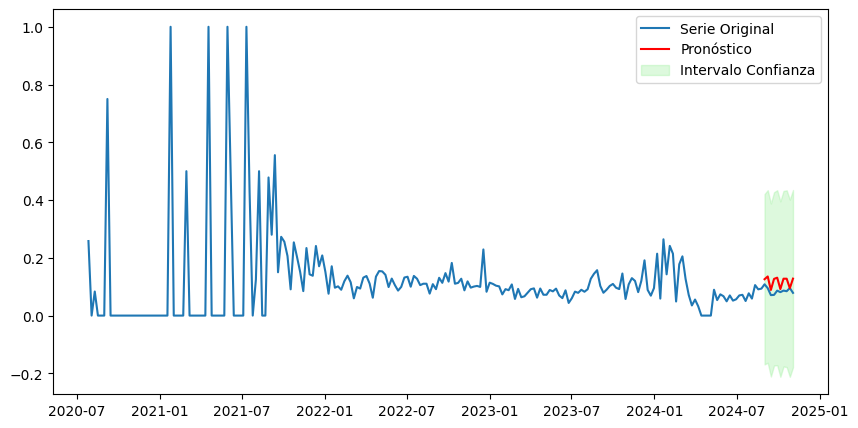

In [62]:
# Ajustamos el modelo ARIMA
# entrenamos el modelo con 10 semanas menos
model = ARIMA(week.iloc[:-10], order=(2, 1, 3))
model_fit = model.fit()

# Predicciones futuras (por ejemplo, 6 pasos adelante)
forecast = model_fit.get_forecast(steps=10)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Mostrar resultados
print("Predicciones:\n", predicted_mean)
print("\nIntervalos de confianza:\n", conf_int)

#  Pintamos los resultados de la predicción
plt.figure(figsize=(10, 5))
plt.plot(week, label='Serie Original')
plt.plot(predicted_mean.index, predicted_mean, label='Pronóstico', color='red')
plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='lightgreen', alpha=0.3, label='Intervalo Confianza')
plt.legend()
plt.show()

__Conclusion__

A pesar de las limitaciones identificadas en el modelo ARIMA, se generaron predicciones para las próximas 10 semanas a modo ilustrativo. Se ajustó el modelo a una porción de los datos (excluyendo las últimas 10 semanas) y se obtuvieron las predicciones con sus respectivos intervalos de confianza. La visualización de las predicciones mostró una tasa de positivos fluctuante con intervalos de confianza amplios, reforzando la conclusión de que el modelo ARIMA (2, 0, 3) no es el más adecuado para esta serie temporal.